### Vapor Field in 2 dimensions

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
from importlib import reload
from matplotlib import rcParams

# QLC-specific code
import QLCstuff as QLC; reload(QLC)

<module 'QLCstuff' from '/Users/nesh/Documents/Repositories/icecontinuum/nesh/Integrated_QLC_VF/QLCstuff.py'>

In [2]:
%matplotlib notebook
ticklabelsize = 15
linewidth = 1
fontsize = 15
color = 'k'
markersize = 10

### Defining system and run parameters

In [3]:
# Preferred units
distance_unit = 'micrometer'
pressure_unit = 'pascal'
time_unit = 'microsecond'
temperature_unit = 'kelvin'

# Temperature
Temperature = AssignQuantity(250,'kelvin')
print('Temperature =',Temperature)

# Ambient pressure
Pressure = AssignQuantity(100,'pascal')
print('Pressure =', Pressure)

# Diffusion through air
Dvap = QLC.getDofTP(Temperature,Pressure,AssignQuantity)
print('Dvap =',Dvap)

# Size of the box
L = AssignQuantity(150,'micrometer')
print('L =', L)

# The far-field distance
x_f = AssignQuantity(1000,'micrometer')

# The far-field supersaturation
sigmaI_far_field = 0.3
print('sigmaI, far field =',sigmaI_far_field)

# Growth rate of the crystal
g_ice = AssignQuantity(2,'micrometer/second')
print('g_ice = ',g_ice)

# The Neumann parameter "g'"
rho_ice = AssignQuantity(0.9,'g/cm^3')
Mvap = AssignQuantity(18,'g/mol')
R = AssignQuantity(8.314,'J/mol/kelvin')
g_vap = rho_ice*g_ice*R*Temperature/Mvap; #print(gprime)
g_vap.ito('pascal * micrometer / second'); #print(gprime)
gprime = g_vap # Renaming this because it's called gprime in the code below

# Equilibrium vapor stuff
P3 = AssignQuantity(611,'Pa')
T3 = AssignQuantity(273,'kelvin')
Delta_H_sub = AssignQuantity(50,'kJ/mol')
P_vapor_eq = P3*np.exp(-Delta_H_sub/R*(1/Temperature-1/T3))
print('P_vapor_eq =', P_vapor_eq)

# The far-field pressure
P_f = P_vapor_eq * (sigmaI_far_field+1)
print('P_f =', P_f)

Temperature = 250 kelvin
Pressure = 100 pascal
Dvap = 18831.978608777987 micrometer ** 2 / microsecond
L = 150 micrometer
sigmaI, far field = 0.3
g_ice =  2 micrometer / second
P_vapor_eq = 80.5128693847561 pascal
P_f = 104.66673020018294 pascal


### The 2-D vaporfield simulation code (box inside a far-field box)
Here we've set aspect ratio to be 1.

dx 6.666666666666667 micrometer
dy 6.666666666666667 micrometer
Using the default dt = 0.00047201035395959875 microsecond
Dxeff =  423.71951869750467 / microsecond
Dyeff =  423.71951869750467 / microsecond
uneumannx =  31.1775 pascal / microsecond
uneumanny =  31.1775 pascal / microsecond
Vapor pressure at this temperature =  80.5128693847561 pascal
udirichlet =  104.66673020018294 pascal
Integrating steps =  31778
Integrating out to  14.999545028128129 microsecond
    box Lx =  146.66666666666669 micrometer
    box Ly =  146.66666666666669 micrometer
    box length (y) =  44
slice(128, 172, None)
slice(128, 172, None)
Shape of u0:
   nx = 301
   ny = 301
Solving using Euler


<IPython.core.display.Javascript object>


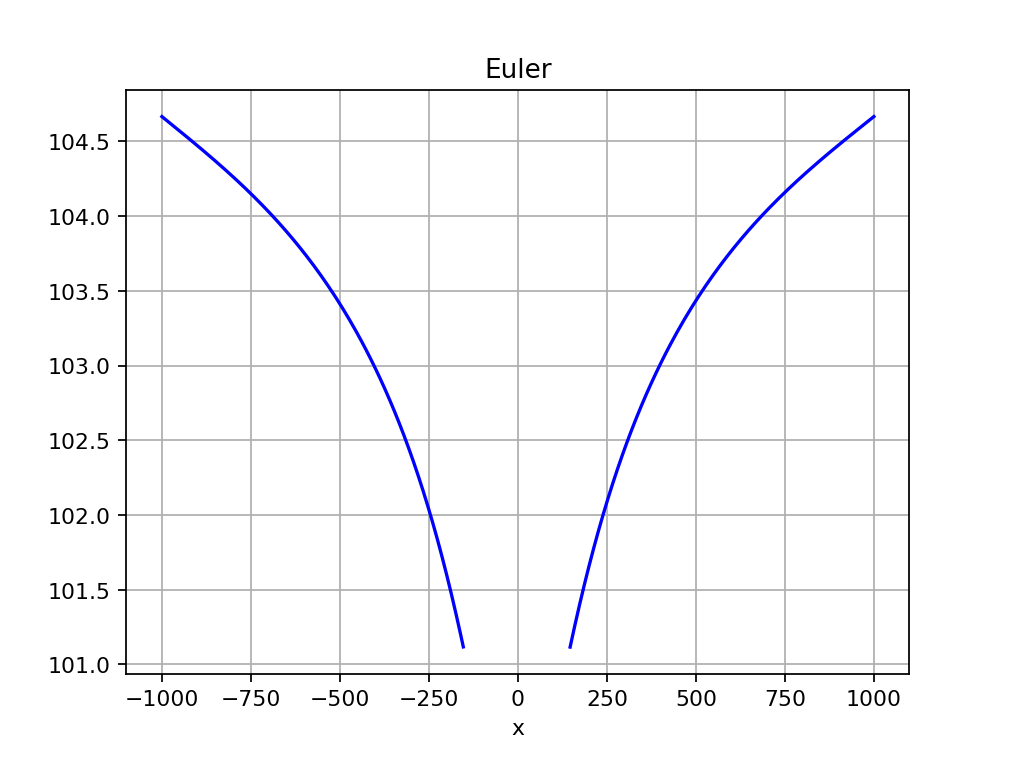

/Users/nesh/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


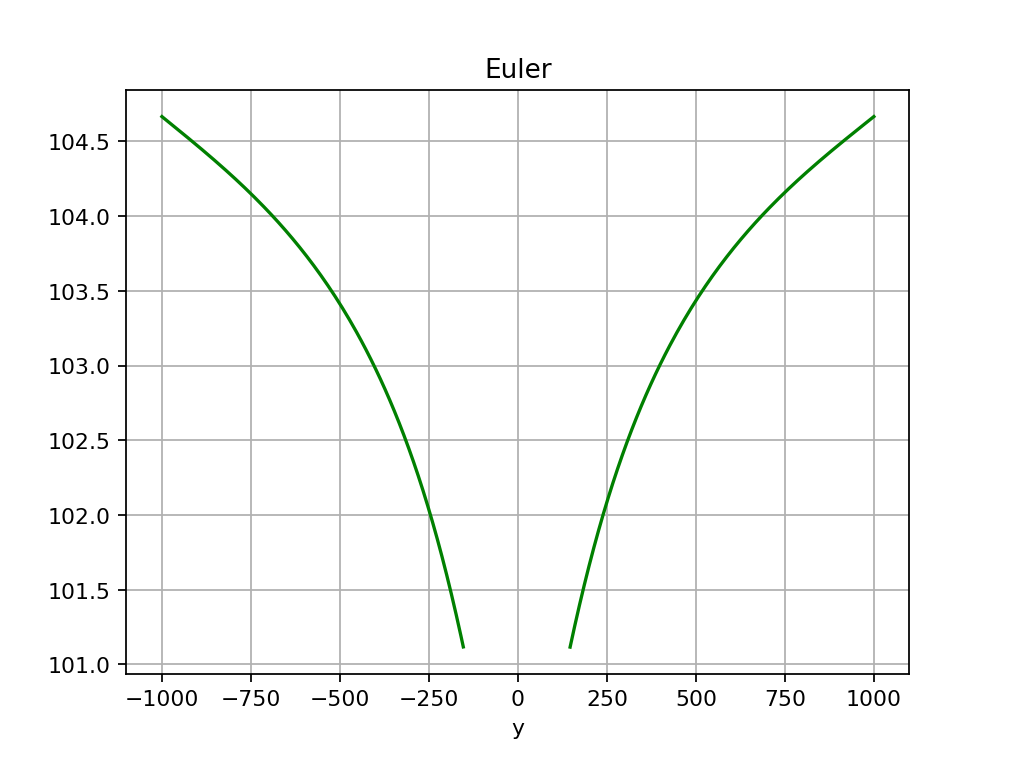

<IPython.core.display.Javascript object>


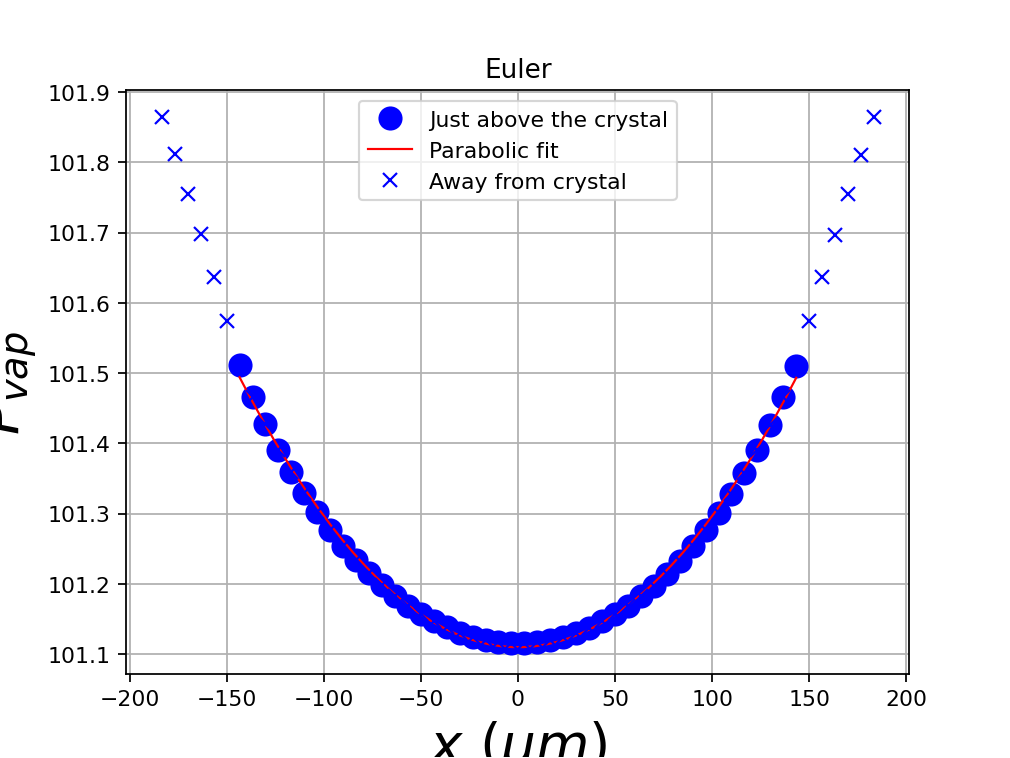

<IPython.core.display.Javascript object>


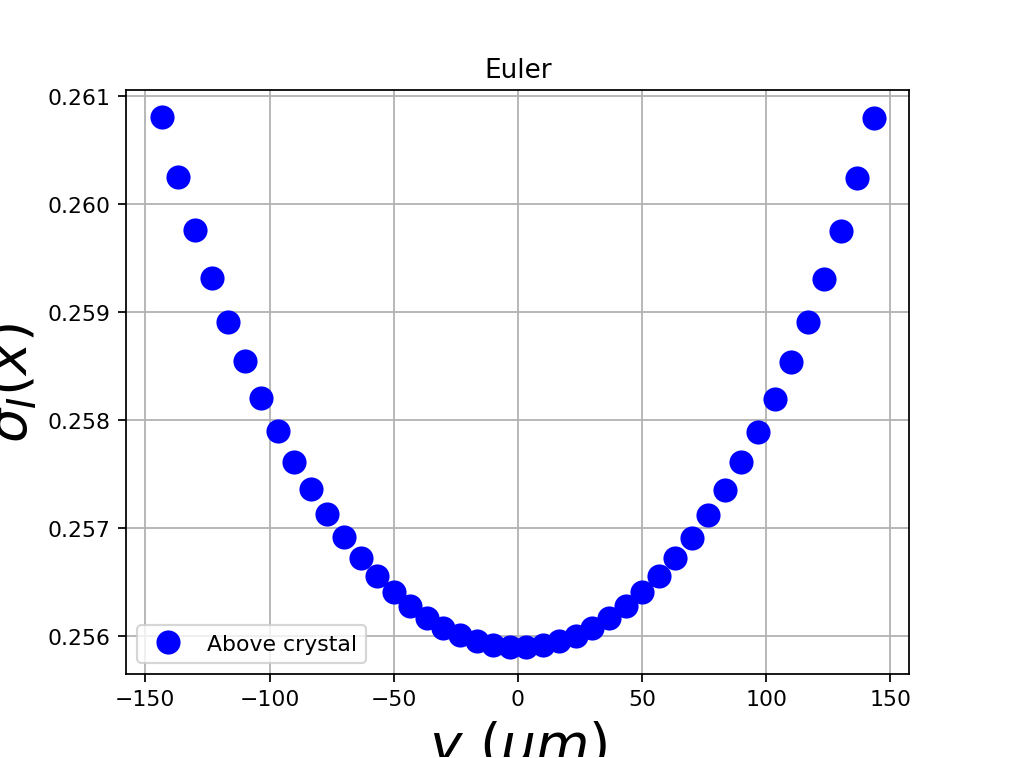

<IPython.core.display.Javascript object>


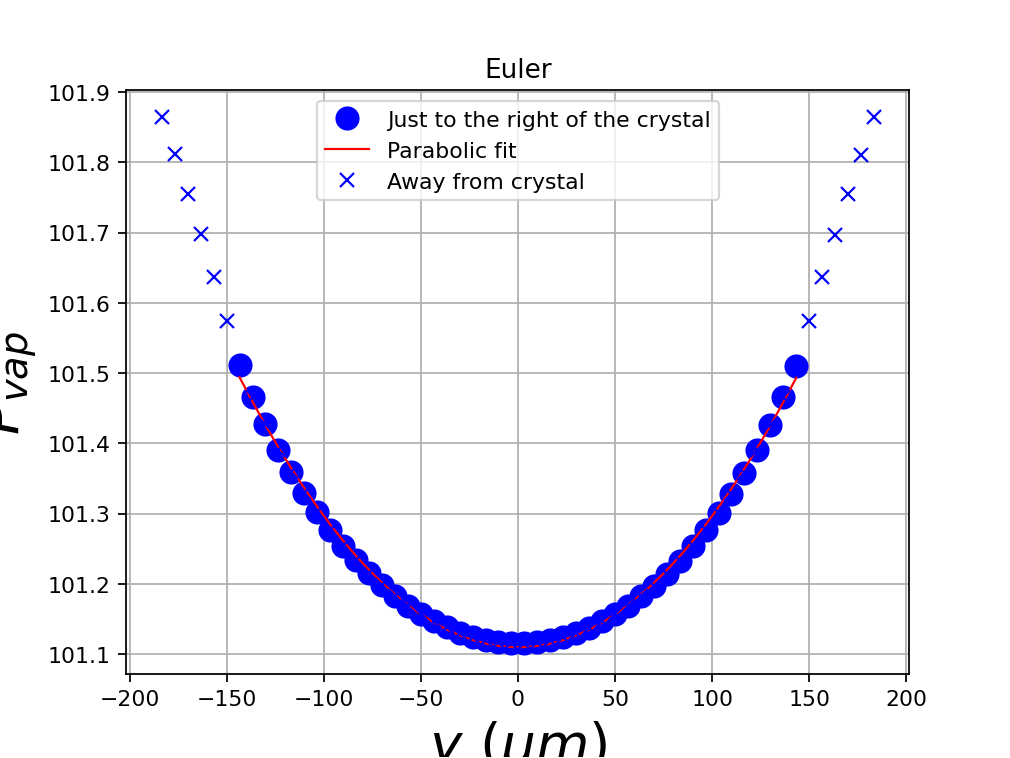

<IPython.core.display.Javascript object>


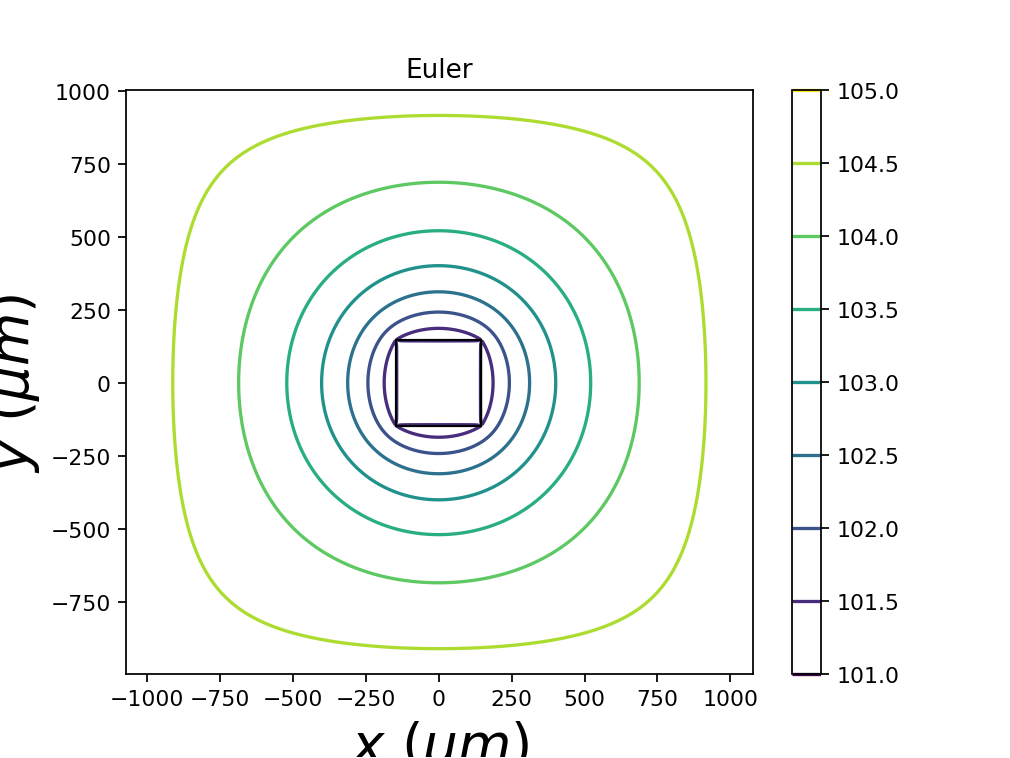

22
At the corner:
   sigmaI = 0.2608098801726677 dimensionless
   Pvap = 101.511421201352 pascal
At the middle:
   sigmaI at middle =  0.25589725334709446 dimensionless
   Pvap = 101.11589151940856 pascal
Center reduction (using vapor pressures):
   c_r = 0.0038964057173318505 dimensionless
   c_r (%) = 0.38964057173318506 dimensionless


In [4]:
# Call the vaporfield code
tmax = AssignQuantity(15,'microsecond')
[x_vapor, sigmaIx_vapor], [y_vapor, sigmaIy_vapor], [x_entire, y_entire, Pvap_entire], [Lx_actual, Ly_actual] = \
    QLC.VF2d(Temperature,Pressure,g_ice,sigmaI_far_field,L,\
             AssignQuantity, tmax_mag=tmax.magnitude, aspect_ratio=1, verbose=2, xmax_mag=2*x_f.magnitude, \
            nx=301, ny=301)

# Numerical results
ny_crystal = len(sigmaIy_vapor)
imid = int(ny_crystal/2); print(imid)
Pvap_corner = (sigmaIy_vapor[0]+1)*P_vapor_eq
print('At the corner:')
print('   sigmaI =', sigmaIy_vapor[0])
print('   Pvap =', Pvap_corner)
Pvap_middle = (sigmaIy_vapor[imid]+1)*P_vapor_eq
print('At the middle:')
print('   sigmaI at middle = ', sigmaIy_vapor[imid])
print('   Pvap =', Pvap_middle)
print('Center reduction (using vapor pressures):')
# c_r = (sigmaIy_vapor[0]-sigmaIy_vapor[imid])/sigmaIy_vapor[0]
c_r = (Pvap_corner-Pvap_middle)/Pvap_corner
print('   c_r =', c_r)
print('   c_r (%) =', c_r*100)

<IPython.core.display.Javascript object>


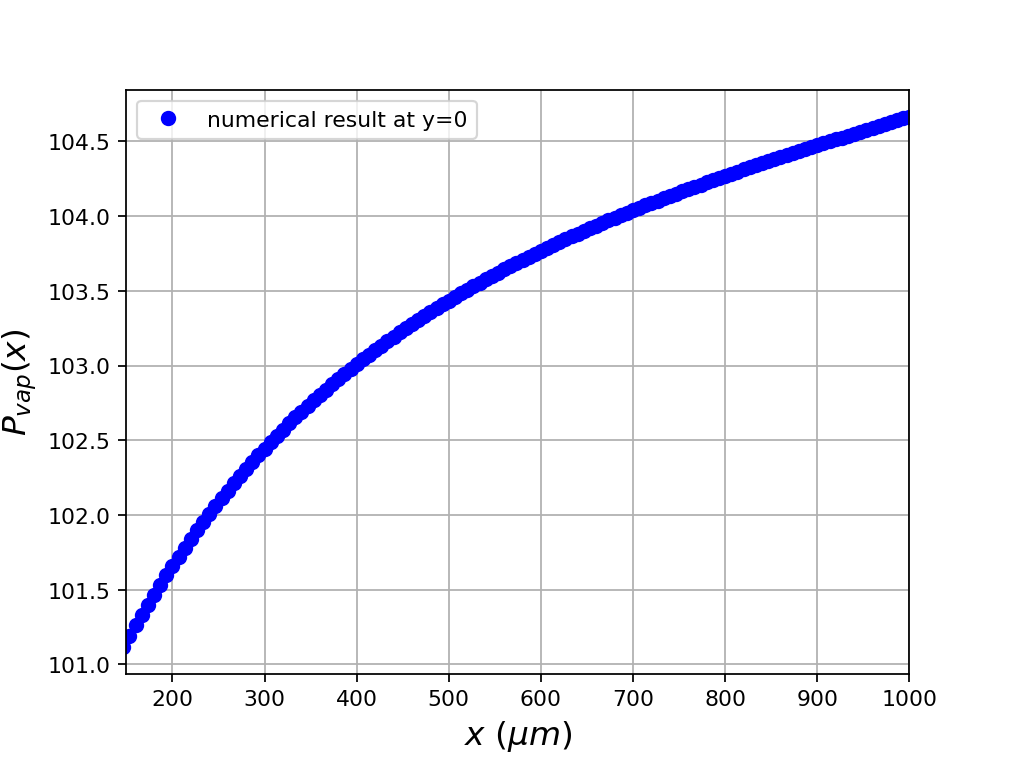

(150.0, 1000.0)

In [5]:
# Plot Pvap(x)
nx, ny = np.shape(Pvap_entire)
ixmid = int(nx/2); iymid=int(ny/2)
Pvap_numerical = Pvap_entire[:,iymid]

plt.figure()        
plt.plot(x_entire.magnitude,Pvap_numerical,'ob',label='numerical result at y=0')
plt.xlabel(r'$x$ ($\mu m$)', fontsize=fontsize)
plt.ylabel(r'$P_{vap}(x)$',fontsize=fontsize)
plt.grid(True)
plt.legend()
plt.xlim(L.magnitude,x_entire[-1].magnitude)

### Analytical solution in polar coordinates 

We're considering the 1-D equation, in which a crystal extending to the right a distance $L$ from the origin, is situated in a box that goes out to $x_f$. We have

$$
{\partial P_{vap} \over \partial t}  = D_{vap} \nabla^2 P_{vap} - g_{vap} {1 \over \Delta r} \ \ \ \ (1)
$$

where ${1 \over \Delta r}$ simulates a Dirac delta function positioned at $r=L_{eff}$, and $P_{f}$ is the vapor pressure at the far field ($r_f$), where Dirichlet conditions will be assumed. We presume we can specify $P_{f}$ and $r_f$, because we have data regarding the spacing between ice crystals in cirrus clouds, and the humidity. $g_{vap}$ is vapor analog of the growth rate of the crystal, $g_{ice}$ (in $\mu m/s$), given by

$$
g_{vap} = g_{ice}  {\rho_{ice} RT \over M_{H_2O}} \ \ \ \ (2)
$$

which we can also specify because we have an idea of how fast ice crystals grow. The Laplacian in polar coordinates is 

$$
 \nabla^2 = {\partial ^2 \over \partial r^2} + {2 \over r}{\partial \over \partial r} \ \ \ \ (3)
$$

Outside the Neumann region (at $r=L_{eff}$), steady-state solution to Eq. 1 requires $\nabla^2P_{vap}=0$, which is satisfied by

$$
P_{vap} = P_1 \times (1-{r_0 \over r})  \ \ \ \ (4)
$$

We can find $P_1$ and $r_0$ using Dirichlet and Neumann conditions. The Dirichlet condition is that at the far field, we have 

$$
P_f \equiv P_{vap}(r_f) = P_1 \times (1-{r_0 \over r_f})  \ \ \ \ (5)
$$

where we assume we can specify $r_f$ and $P_f$ based on physical conditions in a cirrus cloud. The Neumann condition is arrived at by saying that, at $L_{eff}$, the first term in Eq. 3 becomes

$$
 {\partial ^2 P_{vap} \over \partial r^2} = {1 \over \Delta r} {\partial P_{vap} \over \partial r} = P_1 {1 \over \Delta r} {r_0 \over r^2} = P_1 {1 \over \Delta r} {r_0 \over L_{eff}^2} \ \ \ \ (6)
$$

where $\Delta r$ is the width of the "head space," i.e., region just above the growing ice crystal, from which water vapor is removed and converted into ice. The second term in Eq. 3 becomes, at $L_{eff}$, 

$$
{2 \over r}{\partial P_{vap} \over \partial r} =  {2 \over r} P_1 {r_0 \over r^2} = {2 r_0 \over L_{eff}^3} P_1 \ \ \ \ (7)
$$

so the diffusion term becomes

$$
D \nabla^2 P_{vap} = D \times (P_1 {1 \over \Delta r} {r_0 \over L_{eff}^2} + {2 r_0 \over L_{eff}^3} P_1) = D P_1 {r_0 \over L_{eff}^2} \times ({{1 \over \Delta r} + {1 \over L_{eff}}} ) \ \ \ \ (8)
$$

We will suppose that the head space is small compared to the crystal, so Eq. 8 becomes

$$
D_{vap} \nabla^2 P_{vap} \approx D_{vap} P_1 {r_0 \over L_{eff}^2} \times {1 \over \Delta r}  \ \ \ \ (9)
$$

Within this head space, steady state requires that $D_{vap} \nabla^2 P_{vap} = g_{vap} {1 \over \Delta r}$, so 

$$
D_{vap} P_1 {r_0 \over L_{eff}^2} \times {1 \over \Delta r} = g_{vap} {1 \over \Delta r}
$$ 

which allows us to eliminate $\Delta r$. Then, with the help of Eq. 5, we can eliminate $P_1$, giving

$$
D_{vap} {P_f \over (1-{r_0 \over r_f})} {r_0 \over L_{eff}^2} = g_{vap} \ \ \ \ (10)
$$

which leads to

$$
r_0 =  {r_f \over 1+\chi} \ \ \ \ (11)
$$

where 

$$
\chi = {D_{vap}P_f r_f \over g_{vap} L_{eff}^2} = {D_{vap}P_f r_f M_{H_2O} \over g_{ice} \rho_{ice} RT L_{eff}^2}  \ \ \ \ (12)
$$

Once we have $r_0$, we can get $P_1$ from Eq. 2, inverted:

$$
P_1 = {P_f \over 1-{r_0 \over r_f}} \ \ \ \ (13)
$$

There's a question about how to specify the effective radius of the crystal, $L_{eff}$. Here, we assign this value such that the circumference of the circular crystal equals the perimeter length of the square crystal,

$$
L_{eff} = {8 L \over 2 \pi} \ \ \ \ (14) 
$$

where $L$ equals one half the length of each side of the square.

Once we have values for $P_1$ and $r_0$, we can use Eq. 4 to calculate $P_{vap}$ over any range of distances away from the circular crystal. We can also extend that same solution inward, to the distance $L$, which corresponds to the side of the square crystal at $y=0$, or outward to any corner of the square crystal (e.g., at $x=y={L \over 2^{1/2}}$).)

In [6]:
# This part is from the effective surface radius out to the far-field radius

 # far field distance as a radius
r_f = x_f

# Calculating the radius of the equivalent circle
perimeter_of_crystal = 8*Lx_actual
L_eff = perimeter_of_crystal/(2*np.pi)
print('Lx_actual =', Lx_actual)
print('L_eff =',L_eff)

# Parameterizing the analytical form using Neuman and Dirichlet
# r_0 = gprimeprime/(1+gprimeprime/r_f); print('r0 =', r_0)
chi = Dvap*P_f*r_f/(gprime*L_eff**2); chi.ito('dimensionless'); print('chi =', chi)
r_0 = r_f/(1+chi); print('r0 =', r_0)

P1 = P_f/(1-r_0/r_f)
P_L = P1*(1-r_0/L_eff)
P_L_middle = P1*(1-r_0/Lx_actual)
P_L_corner = P1*(1-r_0/Lx_actual/2**.5)

# Here's the range of r-values to use for the analytical result
r_analytical = np.linspace(L_eff,r_f,100)
P_analytical = P1*(1-r_0/r_analytical)
r_analytical_extended = np.linspace(Lx_actual,L_eff,20)
P_analytical_extended = P1*(1-r_0/r_analytical_extended)

# Reporting
print('r_0 =',r_0)
print('P1 =',P1)
print('P_f =',P_f)
print('P_L =', P_L)

sigmaI_corner = (P_L_corner-P_vapor_eq)/P_vapor_eq
print('At the corner:')
print('   sigmaI =', sigmaI_corner)
print('   Pvap =', P_L_corner)
sigmaI_middle = (P_L_middle-P_vapor_eq)/P_vapor_eq
print('At the middle:')
print('   sigmaI =',sigmaI_middle)
print('   Pvap =', P_L_middle)
c_r = (P_L_corner-P_L_middle)/P_L_corner
print('Center reduction (using vapor pressures):')
print('   c_r =', c_r)
print('   c_r(%) =', c_r*100)

Lx_actual = 146.66666666666669 micrometer
L_eff = 186.74179989449055 micrometer
chi = 271.9390020844297 dimensionless
r0 = 3.6638222912922664 micrometer
r_0 = 3.6638222912922664 micrometer
P1 = 105.05162066972908 pascal
P_f = 104.66673020018294 pascal
P_L = 102.99053702501966 pascal
At the corner:
   sigmaI = 0.2817328984050747 dimensionless
   Pvap = 103.19599343543264 pascal
At the middle:
   sigmaI = 0.27218627594548556 dimensionless
   Pvap = 102.42736746827816 pascal
Center reduction (using vapor pressures):
   c_r = 0.007448215202612387 dimensionless
   c_r(%) = 0.7448215202612387 dimensionless


### Numerical solution in polar coordinates

In [7]:
r_1d,un_1d = QLC.VF2d_r1d(Temperature,Pressure,g_ice,sigmaI_far_field,L_eff,\
         AssignQuantity,verbose=1,\
         tmax_mag=tmax.magnitude, dt=0, nr=nx, rmax_mag=1000)

uneumann =  76.67306642823958 pascal / microsecond
Vapor pressure at this temperature =  80.5128693847561 pascal
udirichlet =  104.66673020018294 pascal
Integrating steps =  1153171
Integrating out to  14.999987523019675 microsecond


### Comparisons

<IPython.core.display.Javascript object>


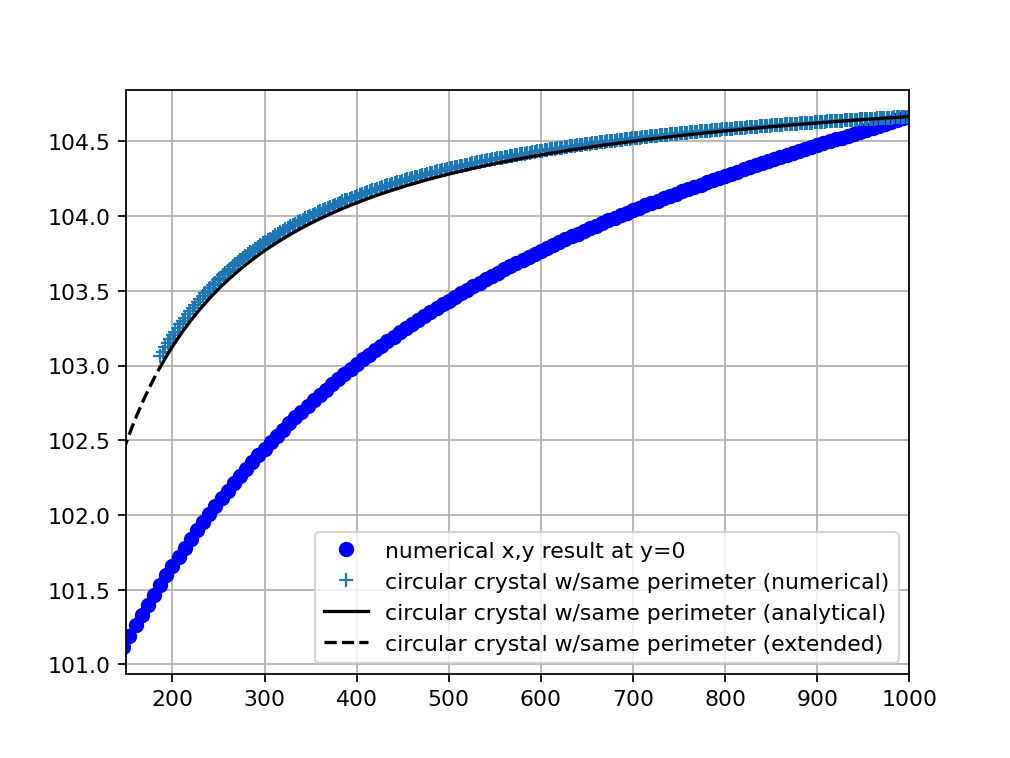

In [8]:
plt.figure()
plt.plot(x_entire.magnitude,Pvap_numerical,'ob',label='numerical x,y result at y=0')
plt.plot(r_1d,un_1d,'+',label='circular crystal w/same perimeter (numerical)')
plt.plot(r_analytical,P_analytical,'k-',label='circular crystal w/same perimeter (analytical)')
plt.plot(r_analytical_extended,P_analytical_extended,'k--',label='circular crystal w/same perimeter (extended)')
plt.legend()
plt.xlim(L.magnitude,x_entire[-1].magnitude)
plt.grid(True)

### Analysis
What the above shows is that for the steady-state solution in polar coordinates, we get the same results analytically and numerically. Yay!

It also means that we can use the analytical extension of the solution ($P_{vap} = P_1 \times (1-{r_0 \over r})$) to predict $P_{vap}$ at the middle of a crystal side, and to a corner, from which we can predict a center reduction

$$
c_r \equiv {P_{vap}(corner) - P_{vap}(middle) \over P_{vap}(corner)}
$$

For a sample case, we get $c_r=0.4\%$ from the 2-D numerical simulation, whereas the exact solution with the "circular approximation," using an "equivalent circumference assumption," gives $c_r=0.7\%$. 

With this, we can imagine a self-consistency loop in which, for a given set of parameters {$T$, $P$, $L$, $\sigma_{I,far}$, and $x_{far}$},

1. Use the analytical vaporfield result to map $g_{ice} → \sigma_{I,corner}$ & $c_r$
1. Use QLC-2 to map $\sigma_{I,corner}$ & $c_r → g_{ice}$
1. Repeat till converged

### Testing the 0d QLC code

In [10]:
# # Time steps
# ntimes = 200
# tlast = AssignQuantity(1000,'microsecond')
# tkeep_0Darr = np.linspace(0,tlast.magnitude,ntimes)
# tkeep_0Darr = AssignQuantity(tkeep_0Darr,'microsecond')
# sigmaI_corner = sigmaIx_vapor[0]; print(sigmaI_corner)

# # Initialize as a pre-equilibrated layer of liquid over ice
# Ntot_init_0D = 0
# NQLL_init_0D = QLC.getNQLL(Ntot_init_0D,Nstar,Nbar)

# # Solve
# Ntotkeep_0D, NQLLkeep_0D = QLC.run_f0d(\
#             NQLL_init_0D, Ntot_init_0D, tkeep_0Darr,\
#             Nbar, Nstar, sigma0, nu_kin_mlyperus, tau_eq, sigmaI_corner)
# Nicekeep_0D = Ntotkeep_0D - NQLLkeep_0D

# # Report
# g_ice_QLC = QLC.report_0d_growth_results(\
#             tkeep_0Darr,NQLLkeep_0D,Ntotkeep_0D,Nicekeep_0D,Nbar,Nstar,nmpermonolayer)
# print('growth rates ... ')
# print('   from previous vaporfield = ',g_ice)
# print('   from QLC = ',g_ice_QLC)

### Now the 0d self-consistency loop

In [11]:
# print('g_ice should be smaller than ', sigmaI_far_field*nu_kin)

# for i in range(5):
    
#     # Update the growth rate from the last QLC run
#     g_ice = (g_ice+g_ice_QLC)/2

#     # Call the vaporfield code
#     [x_vapor, sigmaIx_vapor], [y_vapor, sigmaIy_vapor] = \
#         QLC.VF2d(Temperature,Pressure,g_ice,sigmaI_far_field,L,\
#                  AssignQuantity,tmax=tmax)
    
#     # Use sigmaIx for sigmaI
#     sigmaI_QLC = np.interp(x_QLC,x_vapor,sigmaIx_vapor)
#     c_r = (np.max(sigmaI_QLC)-np.min(sigmaI_QLC))/np.max(sigmaI_QLC)
#     c_r_percent = c_r*100
    
#     # But adjusting it because the vaporfield code isn't symmetrical
#     alpha = c_r*np.max(sigmaIx_vapor)/x_vapor[-1]**2
#     sigmaI_QLC = alpha*x_QLC**2+np.min(sigmaIx_vapor)
#     ix_QLC_mid = int(len(x_QLC)/2)
#     for i in range(0,ix_QLC_mid):
#         sigmaI_QLC[-i-1] = sigmaI_QLC[i]
        
#     # Don't forget to assign the corner supersaturation
#     sigmaI_corner = sigmaIx_vapor[0]

#     # Solve the 0d QLC trajectory with the revised sigmaI
#     Ntotkeep_0D, NQLLkeep_0D = QLC.run_f0d(\
#             NQLL_init_0D, Ntot_init_0D, tkeep_0Darr,\
#             Nbar, Nstar, sigma0, nu_kin_mlyperus, tau_eq, sigmaI_corner)
#     Nicekeep_0D = Ntotkeep_0D - NQLLkeep_0D

#     # Report
#     g_ice_QLC = QLC.report_0d_growth_results(\
#                 tkeep_0Darr,NQLLkeep_0D,Ntotkeep_0D,Nicekeep_0D,Nbar,Nstar,nmpermonolayer,graphics=False)
#     print('growth rates ... ')
#     print('   from previous vaporfield = ',g_ice)
#     print('   from QLC = ',g_ice_QLC)
#     print('   difference = ',g_ice-g_ice_QLC)

# print('Done with the 0d self-consistency loop')
# print('c_r = ', c_r_percent, '%')

### Testing the 1d QLC code

In [12]:
# # Estimating/deciding on how long to make the integration
# print('Estimating times for the trajectory run')
# L_reference = AssignQuantity(1,'millimeter')
# time_reference = AssignQuantity(1,'millisecond')
# tlast_estimated = (L*L_reference/D*time_reference)**.5*1.1
# tlast_estimated.ito('millisecond'); print('   time (est) = ', tlast_estimated)
# tlast_msec = tlast_estimated; print('   time (used) = ',tlast_msec)
# tlast = tlast_msec.to('microsecond')

# # Number of time steps to report back
# ntimes = 100
# tkeep_1Darr = np.linspace(0,tlast,ntimes)
# print('   dt =', tkeep_1Darr[1]-tkeep_1Darr[0])

# # Initialize as a pre-equilibrated layer of liquid over ice
# Ntot_init_1D = np.ones(nx)
# NQLL_init_1D = QLC.getNQLL(Ntot_init_1D,Nstar,Nbar)

# # Solve
# Ntotkeep_1D, NQLLkeep_1D = QLC.run_f1d(\
#                 NQLL_init_1D, Ntot_init_1D, tkeep_1Darr,\
#                 Nbar, Nstar, sigma0, nu_kin_mlyperus, Doverdeltax2, tau_eq, sigmaI_QLC,
#                 AssignQuantity,\
#                 verbose=0, odemethod='LSODA')
# Nicekeep_1D = Ntotkeep_1D-NQLLkeep_1D

# # Report
# g_ice_QLC = QLC.report_1d_growth_results(x_QLC,tkeep_1Darr,NQLLkeep_1D,Ntotkeep_1D,Nicekeep_1D,nmpermonolayer)
# print('growth rates ... ')
# print('   from previous vaporfield = ',g_ice)
# print('   from QLC = ',g_ice_QLC)

### Now the 1d self-consistency loop

In [13]:
# for i in range(2):
    
#     # Update the growth rate from the last QLC run
#     g_ice = (g_ice+g_ice_QLC)/2
#     print('g_ice should be smaller than ...')
#     print('   sigmaI_far_field x nu_kin = ', sigmaI_far_field*nu_kin)

#     # Call the vaporfield code
#     [x_vapor, sigmaIx_vapor], [y_vapor, sigmaIy_vapor] = \
#         QLC.VF2d(Temperature,Pressure,g_ice,sigmaI_far_field,L,\
#                  AssignQuantity,verbose=0,tmax=tmax)
    
#     # Use sigmaIx for sigmaI
#     sigmaI_QLC = np.interp(x_QLC,x_vapor,sigmaIx_vapor)
#     c_r = (np.max(sigmaI_QLC)-np.min(sigmaI_QLC))/np.max(sigmaI_QLC)
#     c_r_percent = c_r*100
    
#     # But adjusting it because the vaporfield code isn't symmetrical
#     beta = c_r*np.max(sigmaIx_vapor)/x_vapor[-1]**2
#     sigmaI_QLC = beta*x_QLC**2+np.min(sigmaIx_vapor)
#     ix_QLC_mid = int(len(x_QLC)/2)
#     for i in range(0,ix_QLC_mid):
#         sigmaI_QLC[-i-1] = sigmaI_QLC[i]

#     # Solve the QLC trajectory with the revised sigmaI
#     Ntotkeep_1D, NQLLkeep_1D = QLC.run_f1d(\
#                     NQLL_init_1D, Ntot_init_1D, tkeep_1Darr,\
#                     Nbar, Nstar, sigma0, nu_kin_mlyperus, Doverdeltax2, tau_eq, sigmaI_QLC,
#                     AssignQuantity,\
#                     verbose=0, odemethod='LSODA')
#     Nicekeep_1D = Ntotkeep_1D-NQLLkeep_1D

#     # Report
#     g_ice_QLC = QLC.report_1d_growth_results(x_QLC,tkeep_1Darr,NQLLkeep_1D,Ntotkeep_1D,Nicekeep_1D,nmpermonolayer)
#     print('From vapor simulation ... ')
#     print("c_r = " + "{:.3f}".format(c_r_percent.magnitude)+'%')
#     print('growth rates ... ')
#     print('   from previous vaporfield = ',g_ice)
#     print('   from QLC = ',g_ice_QLC)
#     print('   difference = ',g_ice-g_ice_QLC)

# alpha = g_ice_QLC/(sigmaI_far_field*nu_kin)
# print('alpha =',alpha)

# lastfraction = 0.3
# itimes_almost_end = int(ntimes*(1-lastfraction))
# f = np.max(Ntotkeep_1D,axis=1) - np.min(Ntotkeep_1D,axis=1)
# nsteps_ss = np.mean(f[itimes_almost_end:-1])
# print('nsteps average of last', lastfraction*100, '% (', ntimes-itimes_almost_end, 'points) =', nsteps_ss)
# lambda_average = L/nsteps_ss
# print('estimated lambda =', lambda_average)

### (Deprecated) Fitting solutions to the numerical 2-D box problem
Here we're trying to see if we can fit Pvap away from the surface.

In [9]:
# # Extract the numerical part in that range
# iL = int(L/x_f*nx/2)+ixmid
# x_fit = x_entire[iL:]
# # Pvap_numerical = Pvap_numerical[iL:]

# def expfun(x,a,b,c):
#     P = a + b*(1 - np.exp(-x/c))
#     return P
# from scipy import optimize

# # A fit
# P_L_start = Pvap_numerical[iL:][0]
# P_L_stop = Pvap_numerical[iL:][-1]
# Delta_P_L = P_L_stop-P_L_start
# x_constant = AssignQuantity(250,'micrometer')
# p0 = [P_L_start.magnitude, Delta_P_L.magnitude, x_constant.magnitude]
# print(p0)
# P_L, Delta_P_L, x_constant = optimize.curve_fit(\
#             expfun, xdata = x_fit.magnitude, ydata = Pvap_numerical[iL:], p0=p0)[0]

# print(P_L, Delta_P_L, x_constant)
# P_bestfit = expfun(x_fit.magnitude,P_L,Delta_P_L,x_constant)
# P_bestfit = AssignQuantity(P_bestfit,'pascal')
# plt.figure()        
# plt.plot(x_entire.magnitude,Pvap_numerical.magnitude,'o',label='numerical result at y=0')
# plt.plot(x_fit.magnitude,P_bestfit.magnitude,'-k',label='best-fit')
# plt.xlabel(r'$x$ ($\mu m$)', fontsize=fontsize)
# plt.ylabel(r'$P_{vap}(x)$',fontsize=fontsize)
# plt.grid(True)
# plt.legend()
# plt.xlim(L.magnitude,x_entire[-1].magnitude)

# print('Best-fit value of P_f =', P_L+Delta_P_L)
# print('Actual value of P_f =',P_f)

# print('r_0 =',x_constant)
# print('P_L =', P_L)